# DAT210x - Programming with Python for DS

## Module6- Lab2

In [42]:
import pandas as pd
import math

import matplotlib.pyplot as plt
from sklearn import svm

The dataset used in this lab comes from https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

At face value, this looks like an easy lab, but it has many parts to it, so prepare yourself by reading through it fully before starting.

### Convenience Functions

In [70]:
def load(path_train, path_test):
    # Load up the data.
    
    # You probably could have written this easily:
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)
        
    
    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]
    n_samples = training.shape[0]
    four_percent_samples = math.ceil(0.04 * n_samples)

    X_test  = testing.iloc[:,:n_features-1]
    X_train = training.iloc[:four_percent_samples,:n_features-1]
    y_test  = testing.iloc[:,n_features-1:].values.ravel()
    y_train = training.iloc[:four_percent_samples,n_features-1:].values.ravel()

    # Special:
    # ...

    return X_train, X_test, y_train, y_test

In [17]:
def peekData(X_train):
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print("Peeking your data...")
    fig = plt.figure()
    fig.set_tight_layout(True)

    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(X_train.iloc[cnt,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1
            
    plt.show()

In [22]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    # INFO: This is the second lab we're demonstrating how to
    # do multi-plots using matplot lab. In the next assignment(s),
    # it'll be your responsibility to use this and assignment #1
    # as tutorials to add in the plotting code yourself!
    num_rows = 10
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            plt.subplot(num_cols, num_rows, index + 1)

            # 8x8 is the size of the image, 64 pixels
            plt.imshow(X_test.iloc[index,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=6, color=fontcolor)
            plt.axis('off')
            index += 1
    plt.show()

### The Assignment

In [71]:
# TODO: Pass in the file paths to the .tra and the .tes files:
X_train, X_test, y_train, y_test = load('Datasets/optdigits.tra', 'Datasets/optdigits.tes')

In [67]:
X_train.shape

(153, 64)

Get to know your data. It seems its already well organized in `[n_samples, n_features]` form. Your dataset looks like (4389, 784). Also your labels are already shaped as `[n_samples]`.

Peeking your data...


IndexError: single positional indexer is out-of-bounds

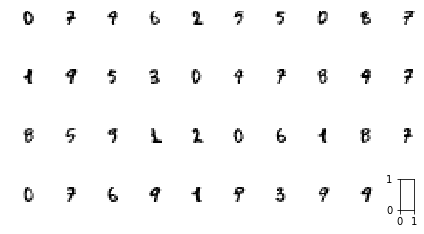

In [60]:
peekData(X_train)

Create an SVC classifier. Leave `C=1`, but set `gamma` to `0.001` and set the `kernel` to `linear`. Then train the model on the training data and labels:

In [61]:
print("Training SVC Classifier...")

# .. your code here ..
from sklearn.svm import SVC
model = SVC(kernel='linear', C = 1, gamma = 0.001, degree = 8)
model.fit(X_train, y_train)


Training SVC Classifier...


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Calculate the score of your SVC against the testing data:

In [62]:
print("Scoring SVC Classifier...")
score = model.score(X_test, y_test)

# .. your code here ..
print("Score:\n", score)

Scoring SVC Classifier...
Score:
 0.693763919822


c:\python36\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


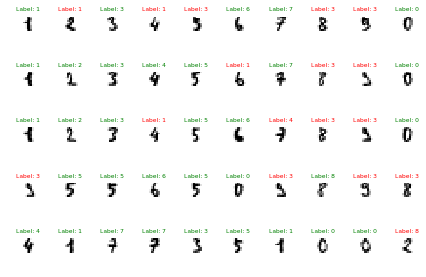

In [63]:
# Let's get some visual confirmation of accuracy:
drawPredictions(X_train, X_test, y_train, y_test)

Print out the TRUE value of the 1000th digit in the test set. By TRUE value, we mean, the actual provided, ground-truth label for that sample:

In [27]:
# .. your code here ..
true_1000th_test_value = y_test[999]
print("1000th test label: ", true_1000th_test_value)

1000th test label:  1


In [29]:
y_test

array([1, 2, 3, ..., 8, 9, 8], dtype=int64)

In [25]:
y_guess = model.predict(X_test)
y_guess.shape

(1796,)

In [35]:
X_test.shape

(1796, 64)

Predict the value of the 1000th digit in the test set. Was your model's prediction correct? If you get a warning on your predict line, look at the notes from the previous module's labs.

In [30]:
# .. your code here ..
guess_1000th_test_value = y_guess[999]
print("1000th test prediction: ", guess_1000th_test_value)

1000th test prediction:  1


Use `imshow()` to display the 1000th test image, so you can visually check if it was a hard image, or an easy image:

(-0.5, 7.5, 7.5, -0.5)

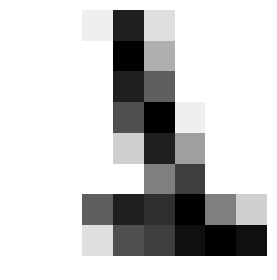

In [37]:
# .. your code here ..
fig = plt.figure()
fig.set_tight_layout(True)
plt.imshow(X_test.iloc[999,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')



### To the Goal

- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and change your SVC's kernel to 'poly' and re-run your lab again.


- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and change your SVC's kernel to 'rbf' and re-run your lab again.


- Were you able to beat the USPS advertised accuracy score of 98%? If so, STOP and answer the lab questions. But if you weren't able to get that high of an accuracy score, go back and tinker with your gamma value and C value until you're able to beat the USPS. Don't stop tinkering until you do. =).

### More Tasks

Only after you're able to beat the +98% accuracy score of the USPS, go back into the `load()` method and look for the line that reads `# Special:`

Immediately under that line, ONLY alter `X_train` and `y_train`. Keep just the ___FIRST___ 4% of the samples. In other words, for every 100 samples found, throw away 96 of them. To make this easy, keep the samples and labels from th beginning of your `X_train` and `y_train` vectors.

If the first 4% of your train vector's size yields is a decimal number, then use `ceil` to round up to the nearest whole integer.

This operation might require some Pandas indexing skills, or rather some _numpy_ indexing skills, if you'd like to go that route. Feel free to ask on the class forum if you'd like a tip on how to do this; but try to exercise your own muscles first! 

Re-Run your application after throwing away 96% your training data. What accuracy score do you get now?

### Even More Tasks...

Change your kernel back to linear and run your assignment one last time. What's the accuracy score this time?

Surprised?